<a href="https://colab.research.google.com/github/aniket20june/Big-Data-Project/blob/main/BigData_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bd = pd.read_csv('drive/My Drive/abc.csv', delimiter=',')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
a=bd.loc[bd['Country']=='India']

In [ ]:
bd.drop(['Currency of Commitment', 'First Repayment Date', 'Closed Date (Most Recent)', 'Effective Date (Most Recent)', 'Board Approval Date', 'Agreement Signing Date', 'Last Repayment Date', 'First Repayment Date', 'Last Disbursement Date'],
        axis=1, inplace=True)

In [ ]:
bd.drop(['Due 3rd Party'],axis=1,inplace=True)

In [ ]:
bd.dropna(inplace=True)

In [ ]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702872 entries, 0 to 969425
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   End of Period              702872 non-null  object 
 1   Loan Number                702872 non-null  object 
 2   Region                     702872 non-null  object 
 3   Country Code               702872 non-null  object 
 4   Country                    702872 non-null  object 
 5   Borrower                   702872 non-null  object 
 6   Guarantor Country Code     702872 non-null  object 
 7   Guarantor                  702872 non-null  object 
 8   Loan Type                  702872 non-null  object 
 9   Loan Status                702872 non-null  object 
 10  Interest Rate              702872 non-null  float64
 11  Project ID                 702872 non-null  object 
 12  Project Name               702872 non-null  object 
 13  Original Principal Amount  70

In [ ]:
bd.describe()

,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Loans Held
count,702872.000,702872.000,702872.000,702872.000,702872.000,702872.000,702872.000,702872.000,702872.000,702872.000,702872.000,702872.000
mean,4.506,80379513.463,9672336.841,7591349.612,63108147.080,42697908.697,20209531.688,-350360.041,19859171.646,315992.296,315992.296,27800881.300
std,3.357,149976857.225,44791902.724,51671346.399,130661736.058,91675659.105,94423305.982,9321941.006,91213034.625,3516286.494,3516286.494,112647459.354
min,0.000,0.000,0.000,-0.120,0.000,0.000,-100507431.100,-990355392.300,-0.220,0.000,0.000,-100507431.100
25%,0.690,11578992.210,0.000,0.000,6698946.600,3047526.300,0.000,0.000,0.000,0.000,0.000,0.000
50%,5.430,32000000.000,1315.930,0.000,23000000.000,15393673.980,0.000,0.000,0.000,0.000,0.000,0.000
75%,7.250,92000000.000,3641819.830,0.000,67027447.880,45581518.100,0.000,0.000,0.000,0.000,0.000,0.000
max,12.000,3750000000.000,1995000000.000,3379010725.000,3110973281.000,3000000000.000,2857864740.000,319582303.200,2486028941.000,249962000.000,249962000.000,3750000000.000


In [ ]:
x=['Interest Rate','Original Principal Amount','Cancelled Amount','Undisbursed Amount','Disbursed Amount','Repaid to IBRD','Due to IBRD','Exchange Adjustment',"Borrower's Obligation",'Sold 3rd Party','Repaid 3rd Party','Loans Held'  ]

In [ ]:
for i in x:
  bd[i]=(bd[i]-bd[i].min())/(bd[i].max()-bd[i].min())

In [ ]:
pd.set_option('display.float_format',lambda x: '%.3f' %x)

In [ ]:
bd.describe()

,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Loans Held
count,702872.000,702872.000,702872.000,702872.000,702872.000,702872.000,702872.000,702872.000,702872.000,702872.000,702872.000,702872.000
mean,0.375,0.021,0.005,0.002,0.020,0.014,0.041,0.756,0.008,0.001,0.001,0.033
std,0.280,0.040,0.022,0.015,0.042,0.031,0.032,0.007,0.037,0.014,0.014,0.029
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.057,0.003,0.000,0.000,0.002,0.001,0.034,0.756,0.000,0.000,0.000,0.026
50%,0.452,0.009,0.000,0.000,0.007,0.005,0.034,0.756,0.000,0.000,0.000,0.026
75%,0.604,0.025,0.002,0.000,0.022,0.015,0.034,0.756,0.000,0.000,0.000,0.026
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
bd.corr()

,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Loans Held
Interest Rate,1.000,-0.275,-0.076,-0.196,-0.213,-0.024,-0.274,0.053,-0.278,0.043,0.043,-0.319
Original Principal Amount,-0.275,1.000,0.311,0.372,0.891,0.595,0.655,-0.239,0.654,-0.007,-0.007,0.720
Cancelled Amount,-0.076,0.311,1.000,-0.021,0.028,0.056,-0.014,0.012,-0.014,-0.017,-0.017,-0.021
Undisbursed Amount,-0.196,0.372,-0.021,1.000,0.037,-0.064,0.113,-0.048,0.112,-0.013,-0.013,0.554
Disbursed Amount,-0.213,0.891,0.028,0.037,1.000,0.691,0.713,-0.262,0.711,0.003,0.003,0.614
Repaid to IBRD,-0.024,0.595,0.056,-0.064,0.691,1.000,-0.013,0.027,-0.011,-0.015,-0.015,-0.040
Due to IBRD,-0.274,0.655,-0.014,0.113,0.713,-0.013,1.000,-0.388,0.996,-0.019,-0.019,0.890
Exchange Adjustment,0.053,-0.239,0.012,-0.048,-0.262,0.027,-0.388,1.000,-0.299,0.003,0.003,-0.347
Borrower's Obligation,-0.278,0.654,-0.014,0.112,0.711,-0.011,0.996,-0.299,1.000,-0.020,-0.020,0.886
Sold 3rd Party,0.043,-0.007,-0.017,-0.013,0.003,-0.015,-0.019,0.003,-0.020,1.000,1.000,-0.022


In [ ]:
bd.drop(['Country Code','Guarantor Country Code','End of Period','Loan Number'],axis=1,inplace=True)

In [ ]:
bd.drop(['Project Name '],axis=1,inplace=True)

In [ ]:
x=bd.columns
x=set(x) - set(['Region','Country','Borrower','Guarantor','Loan Status','Project ID'])
print(x)

{'Cancelled Amount', "Borrower's Obligation", 'Interest Rate', 'Loan Type', 'Undisbursed Amount', 'Disbursed Amount', 'Original Principal Amount', 'Sold 3rd Party', 'Due to IBRD', 'Loans Held', 'Repaid to IBRD', 'Repaid 3rd Party', 'Exchange Adjustment'}


In [ ]:
bd2=bd[x]

In [ ]:
bd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702872 entries, 0 to 969425
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Cancelled Amount           702872 non-null  float64
 1   Borrower's Obligation      702872 non-null  float64
 2   Interest Rate              702872 non-null  float64
 3   Loan Type                  702872 non-null  object 
 4   Undisbursed Amount         702872 non-null  float64
 5   Disbursed Amount           702872 non-null  float64
 6   Original Principal Amount  702872 non-null  float64
 7   Sold 3rd Party             702872 non-null  float64
 8   Due to IBRD                702872 non-null  float64
 9   Loans Held                 702872 non-null  float64
 10  Repaid to IBRD             702872 non-null  float64
 11  Repaid 3rd Party           702872 non-null  float64
 12  Exchange Adjustment        702872 non-null  float64
dtypes: float64(12), object(1)
mem

In [ ]:
bd2=pd.get_dummies(bd2,drop_first=True)
bd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702872 entries, 0 to 969425
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Cancelled Amount           702872 non-null  float64
 1   Borrower's Obligation      702872 non-null  float64
 2   Interest Rate              702872 non-null  float64
 3   Undisbursed Amount         702872 non-null  float64
 4   Disbursed Amount           702872 non-null  float64
 5   Original Principal Amount  702872 non-null  float64
 6   Sold 3rd Party             702872 non-null  float64
 7   Due to IBRD                702872 non-null  float64
 8   Loans Held                 702872 non-null  float64
 9   Repaid to IBRD             702872 non-null  float64
 10  Repaid 3rd Party           702872 non-null  float64
 11  Exchange Adjustment        702872 non-null  float64
 12  Loan Type_CPL              702872 non-null  uint8  
 13  Loan Type_FSL              70

In [ ]:
y=bd2['Interest Rate'].values

In [ ]:
features=set(bd2.columns)-set(['Interest Rate'])
x=bd2[features].values
x=x.reshape(702872,-1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
mdl=LinearRegression()

In [ ]:
mdl.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred=mdl.predict(testx)

In [ ]:
acs=np.sqrt(mean_squared_error(testy,pred))
print(1-acs)

0.8580005678365559


In [ ]:
bd['Region'].replace('AFRICA','Africa',inplace=True)
bd['Region'].replace('LATIN AMERICA AND CARIBBEAN','Latin America and Caribbean',inplace=True)
bd['Region'].replace('SOUTH ASIA','South Asia',inplace=True)
bd['Region'].replace('EAST ASIA AND PACIFIC','East Asia and Pacific',inplace=True)
bd['Region'].replace('EUROPE AND CENTRAL ASIA','Europe and Central Asia',inplace=True)
bd['Region'].replace('MIDDLE EAST AND NORTH AFRICA','Middle East and North Africa',inplace=True)

In [ ]:
bd['Region'].value_counts()

Latin America and Caribbean     232983
East Asia and Pacific           159381
Europe and Central Asia         121462
Middle East and North Africa     84737
Africa                           63248
South Asia                       38841
AFRICA WEST                       1149
AFRICA EAST                       1071
Name: Region, dtype: int64

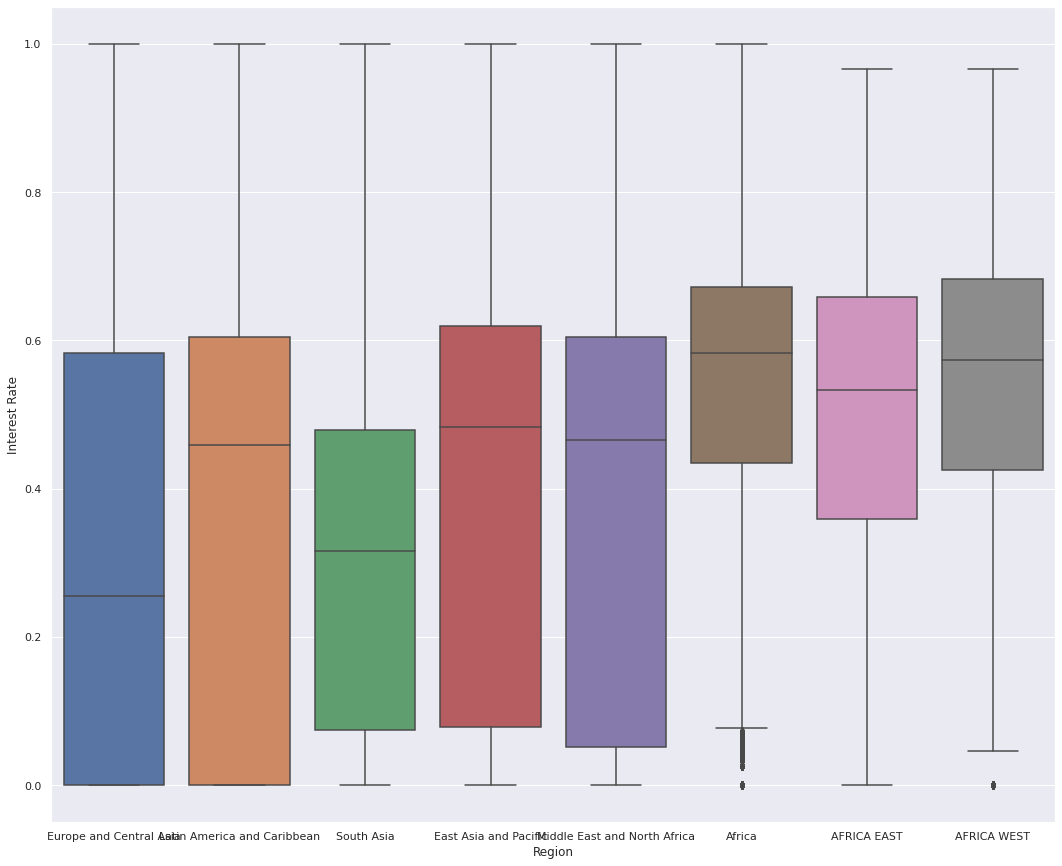

In [ ]:
sns.set(rc={'figure.figsize':(18,15)})
sns.boxplot(x='Region',y='Interest Rate',data=bd)

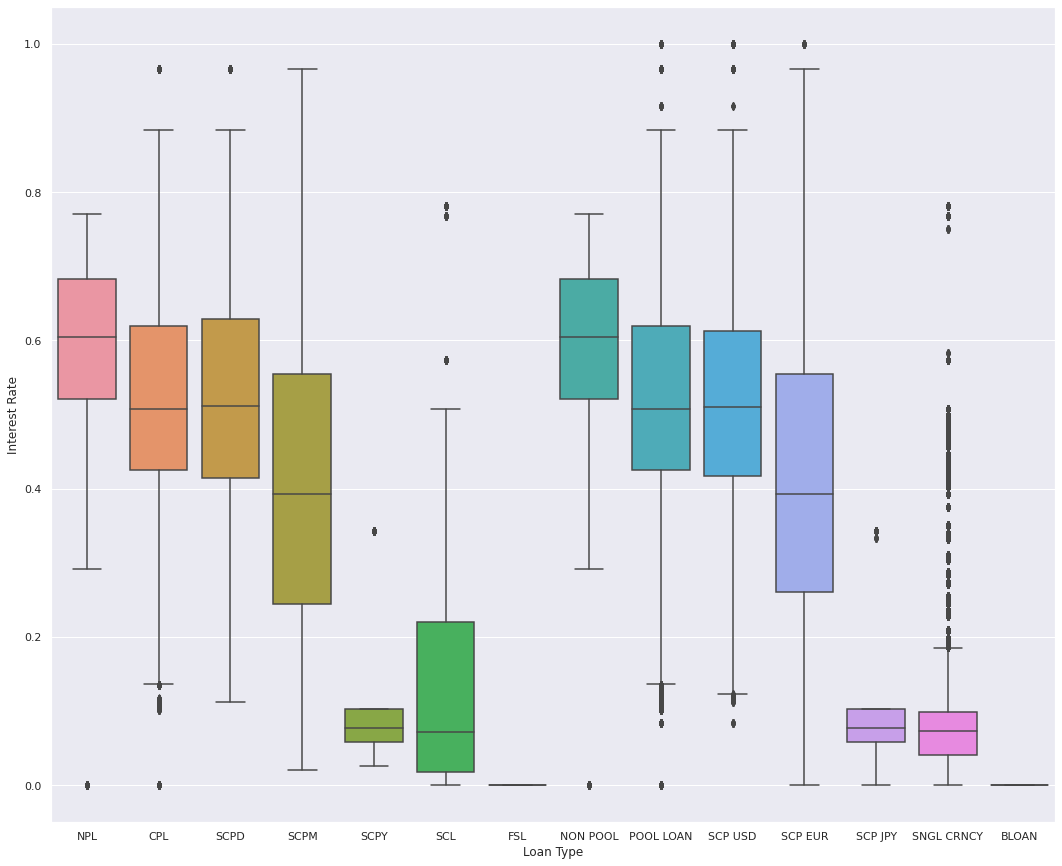

In [ ]:
sns.boxplot(x='Loan Type',y='Interest Rate',data=bd)

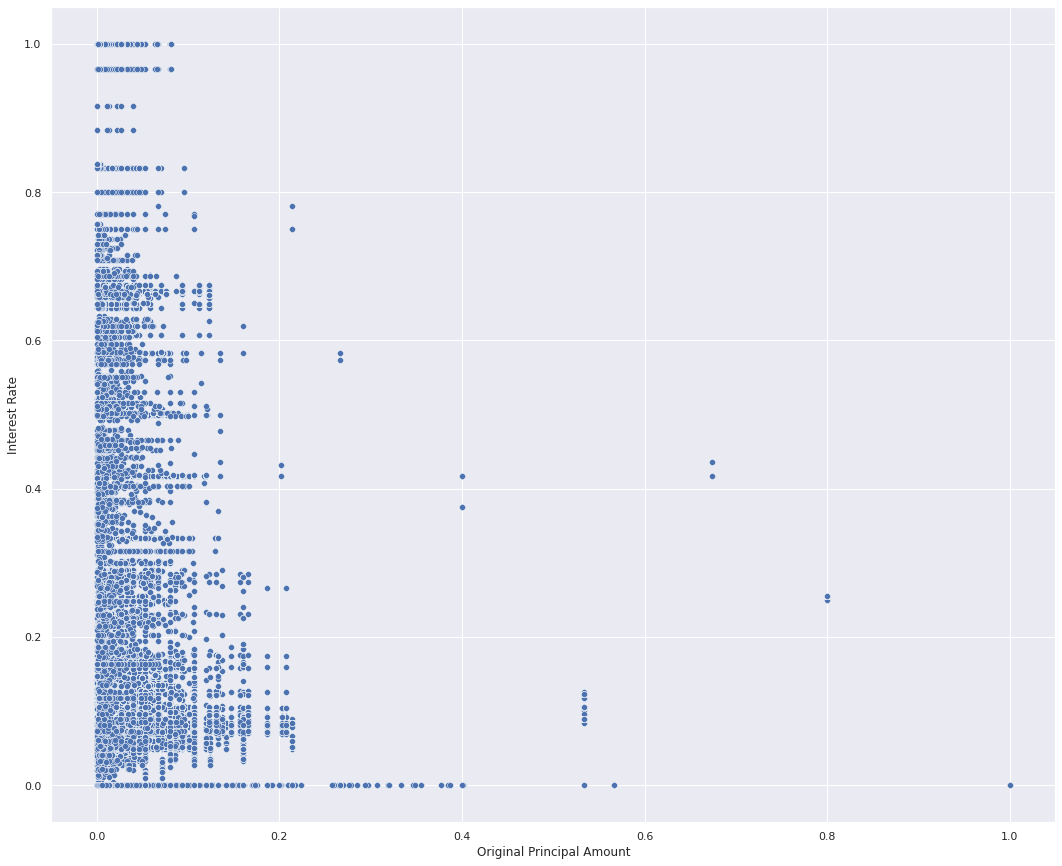

In [ ]:
sns.scatterplot(x='Original Principal Amount',y='Interest Rate',data=bd)

In [ ]:
pd.crosstab(index=bd['Interest Rate'],columns=bd['Country'])

Country,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Azerbaijan,Bangladesh,Barbados,Belarus,Belgium,Belize,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burundi,Cabo Verde,Cameroon,Cape Verde,Caribbean,Chad,Chile,China,Colombia,"Congo, Democratic Republic of","Congo, Republic of",Costa Rica,Cote d'Ivoire,Croatia,Cyprus,Czech Republic,Dominica,Dominican Republic,Eastern Africa,Ecuador,"Egypt, Arab Republic of",El Salvador,...,Paraguay,Peru,Philippines,Poland,Romania,Russian Federation,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,South Africa,Sri Lanka,St. Kitts and Nevis,St. Lucia,St. Vincent and the Grenadines,Sudan,Suriname,Swaziland,Syrian Arab Republic,"Taiwan, China",Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,Uruguay,Uzbekistan,"Venezuela, Republica Bolivariana de",Vietnam,Western Africa,Zambia,Zimbabwe
Interest Rate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000,1150,2176,292,81,5522,1993,0,1874,0,170,1072,0,309,248,624,333,11941,470,0,73,215,19,0,0,1515,9608,7483,0,131,633,74,2470,0,0,425,2228,0,1891,3160,1472,...,1721,5054,3906,1896,1097,488,0,1939,501,0,0,595,395,255,311,597,850,425,0,35,210,0,85,0,1606,58,0,518,4294,5989,0,0,1350,2583,478,160,924,0,0,0
0.002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0
0.004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0
0.009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.883,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,0,0,0,0,0,0,0,0,0,0,0
0.917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([10939.,  2247.,  1386.,  6905.,  5250.,  2089.,  3501.,  1150.,
          222.,   698.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

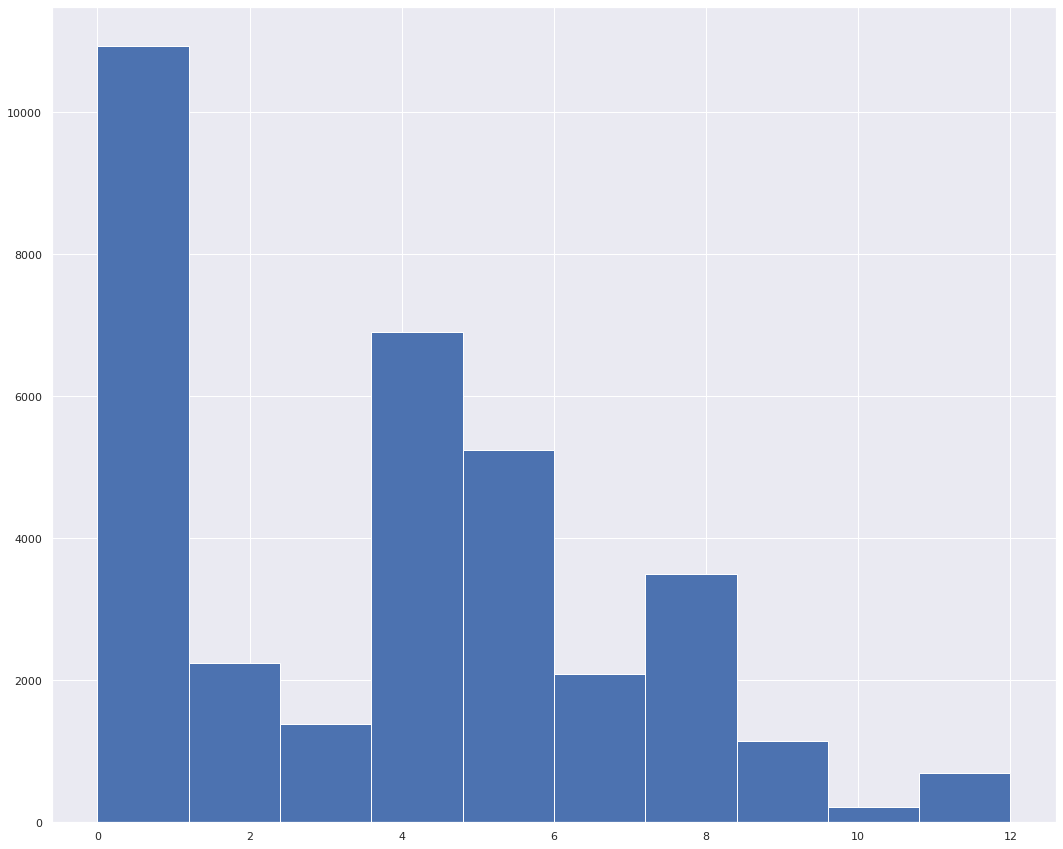

In [ ]:
plt.hist(a['Interest Rate'])

In [ ]:
bd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702872 entries, 0 to 969425
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Cancelled Amount           702872 non-null  float64
 1   Borrower's Obligation      702872 non-null  float64
 2   Interest Rate              702872 non-null  float64
 3   Undisbursed Amount         702872 non-null  float64
 4   Disbursed Amount           702872 non-null  float64
 5   Original Principal Amount  702872 non-null  float64
 6   Sold 3rd Party             702872 non-null  float64
 7   Due to IBRD                702872 non-null  float64
 8   Loans Held                 702872 non-null  float64
 9   Repaid to IBRD             702872 non-null  float64
 10  Repaid 3rd Party           702872 non-null  float64
 11  Exchange Adjustment        702872 non-null  float64
 12  Loan Type_CPL              702872 non-null  uint8  
 13  Loan Type_FSL              70

### **New Work by Vaibhav 22 NOV**

In [ ]:
bd.describe()

,Interest Rate,Currency of Commitment,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held
count,940839.000000,0.0,9.694260e+05,9.694260e+05,9.694260e+05,9.694260e+05,9.694260e+05,9.694260e+05,9.694260e+05,9.694260e+05,9.694260e+05,9.694260e+05,969426.0,9.694260e+05
mean,4.671151,NaN,7.798162e+07,9.814707e+06,7.686284e+06,6.053063e+07,4.028684e+07,1.992957e+07,-2.774880e+05,1.965208e+07,4.398595e+05,4.398595e+05,0.0,2.761585e+07
std,3.394579,NaN,1.498861e+08,4.506738e+07,5.296174e+07,1.294894e+08,8.877221e+07,9.527140e+07,9.851818e+06,9.233145e+07,3.848737e+06,3.848737e+06,0.0,1.147341e+08
min,0.000000,NaN,0.000000e+00,0.000000e+00,-1.226600e+08,0.000000e+00,0.000000e+00,-1.005074e+08,-9.903554e+08,-2.200000e-01,0.000000e+00,0.000000e+00,0.0,-1.226600e+08
25%,0.730000,NaN,1.002500e+07,0.000000e+00,0.000000e+00,5.675190e+06,2.487313e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
50%,5.510000,NaN,3.000000e+07,3.776200e+02,0.000000e+00,2.100000e+07,1.407260e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
75%,7.350000,NaN,8.700000e+07,3.550647e+06,0.000000e+00,6.114535e+07,4.185000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
max,17.000000,NaN,3.750000e+09,1.995000e+09,3.379011e+09,3.110973e+09,3.000000e+09,2.923282e+09,5.065767e+08,2.842924e+09,2.499620e+08,2.499620e+08,0.0,3.750000e+09


In [ ]:
bd.columns

Index(['End of Period', 'Loan Number', 'Region', 'Country Code', 'Country',
       'Borrower', 'Guarantor Country Code', 'Guarantor', 'Loan Type',
       'Loan Status', 'Interest Rate', 'Currency of Commitment', 'Project ID',
       'Project Name ', 'Original Principal Amount', 'Cancelled Amount',
       'Undisbursed Amount', 'Disbursed Amount', 'Repaid to IBRD',
       'Due to IBRD', 'Exchange Adjustment', 'Borrower's Obligation',
       'Sold 3rd Party', 'Repaid 3rd Party', 'Due 3rd Party', 'Loans Held',
       'First Repayment Date', 'Last Repayment Date', 'Agreement Signing Date',
       'Board Approval Date', 'Effective Date (Most Recent)',
       'Closed Date (Most Recent)', 'Last Disbursement Date'],
      dtype='object')

In [ ]:
np.unique(bd['End of Period']).size

114

In [ ]:
np.unique(bd['Loan Number']).size

10053

In [ ]:
np.unique(bd['Region'])

array(['AFRICA', 'AFRICA EAST', 'AFRICA WEST', 'Africa',
       'EAST ASIA AND PACIFIC', 'EUROPE AND CENTRAL ASIA',
       'East Asia and Pacific', 'Europe and Central Asia',
       'LATIN AMERICA AND CARIBBEAN', 'Latin America and Caribbean',
       'MIDDLE EAST AND NORTH AFRICA', 'Middle East and North Africa',
       'OTHER', 'Other', 'SOUTH ASIA', 'South Asia'], dtype=object)

In [ ]:
bd.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Currency of Commitment,Project ID,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,06/30/2020 12:00:00 AM,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,4.25,NaN,P037383,RECONSTRUCTION,2.500000e+08,0.00,0.0,2.500000e+08,3.800000e+04,0.0,0.00,0.00,2.499620e+08,2.499620e+08,0,0.0,11/01/1952 12:00:00 AM,05/01/1977 12:00:00 AM,05/09/1947 12:00:00 AM,05/09/1947 12:00:00 AM,06/09/1947 12:00:00 AM,12/31/1947 12:00:00 AM,NaN
1,06/30/2020 12:00:00 AM,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,1.910442e+08,0.00,0.0,1.910442e+08,1.033722e+08,0.0,-0.01,-0.01,8.767200e+07,8.767200e+07,0,0.0,04/01/1952 12:00:00 AM,10/01/1972 12:00:00 AM,08/07/1947 12:00:00 AM,08/07/1947 12:00:00 AM,09/11/1947 12:00:00 AM,03/31/1948 12:00:00 AM,NaN
2,06/30/2020 12:00:00 AM,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,3.955788e+06,0.00,0.0,3.955788e+06,0.000000e+00,0.0,0.00,0.00,3.955788e+06,3.955788e+06,0,0.0,04/01/1953 12:00:00 AM,04/01/1954 12:00:00 AM,05/25/1948 12:00:00 AM,08/07/1947 12:00:00 AM,06/01/1948 12:00:00 AM,06/30/1948 12:00:00 AM,NaN
3,06/30/2020 12:00:00 AM,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037362,RECONSTRUCTION,4.000000e+07,0.00,0.0,4.000000e+07,1.777100e+07,0.0,0.00,0.00,2.222900e+07,2.222900e+07,0,0.0,02/01/1953 12:00:00 AM,08/01/1972 12:00:00 AM,08/22/1947 12:00:00 AM,08/22/1947 12:00:00 AM,10/17/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN
4,06/30/2020 12:00:00 AM,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037451,RECONSTRUCTION,1.200000e+07,238016.98,0.0,1.176198e+07,1.619983e+06,0.0,-0.01,-0.01,1.014200e+07,1.014200e+07,0,0.0,07/15/1949 12:00:00 AM,07/15/1972 12:00:00 AM,08/28/1947 12:00:00 AM,08/28/1947 12:00:00 AM,10/24/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN


In [ ]:
np.unique(bd['Loan Type'])

array(['BLNC', 'BLNR', 'BLOAN', 'CPL', 'FSL', 'GUBF', 'GURB', 'Guarantee',
       'IFC LOAN', 'IFCM', 'IFCT', 'NON POOL', 'NPL', 'POOL LOAN', 'SCL',
       'SCP EUR', 'SCP JPY', 'SCP USD', 'SCPD', 'SCPM', 'SCPY',
       'SNGL CRNCY'], dtype=object)

In [ ]:
np.unique(bd['Loan Status'])

array(['Approved', 'Cancelled', 'Disbursed', 'Disbursing',
       'Disbursing&Repaying', 'Draft', 'Effective', 'Fully Cancelled',
       'Fully Disbursed', 'Fully Repaid', 'Fully Transferred',
       'Negotiated', 'Repaid', 'Repaying', 'Signed', 'Terminated'],
      dtype=object)

In [ ]:
np.unique(bd['Interest Rate']).size

29243

In [ ]:
bd['Interest Rate'].isnull().sum()

28587

In [ ]:
bd['Currency of Commitment'].isnull().sum()

969426

In [ ]:
bd['Project ID'].isnull().sum()

0

In [ ]:
bd[['Project ID']]=bd[['Project ID']].fillna(value=0)

In [ ]:
bd['Project ID']=str(bd['Project ID'])

In [ ]:
bd['Project Name ']=str(bd['Project Name '])

In [ ]:
np.unique(bd['Project Name '])

array(['0                  RECONSTRUCTION\n1                  RECONSTRUCTION\n2                  RECONSTRUCTION\n3                  RECONSTRUCTION\n4                  RECONSTRUCTION\n                   ...           \n969421    SN METAL TECHNICAL ASST\n969422           WATER SUP & ENG.\n969423    PETROLEUM EXPLORATION I\n969424               SIDERPERU TA\n969425           COAL EXPLORATION\nName: Project Name , Length: 969426, dtype: object'],
      dtype=object)

In [ ]:
bd['Project Name '].isnull().sum()

0

In [ ]:
bd.describe()

,Interest Rate,Currency of Commitment,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held
count,940839.000000,0.0,9.694260e+05,9.694260e+05,9.694260e+05,9.694260e+05,9.694260e+05,9.694260e+05,9.694260e+05,9.694260e+05,9.694260e+05,9.694260e+05,969426.0,9.694260e+05
mean,4.671151,NaN,7.798162e+07,9.814707e+06,7.686284e+06,6.053063e+07,4.028684e+07,1.992957e+07,-2.774880e+05,1.965208e+07,4.398595e+05,4.398595e+05,0.0,2.761585e+07
std,3.394579,NaN,1.498861e+08,4.506738e+07,5.296174e+07,1.294894e+08,8.877221e+07,9.527140e+07,9.851818e+06,9.233145e+07,3.848737e+06,3.848737e+06,0.0,1.147341e+08
min,0.000000,NaN,0.000000e+00,0.000000e+00,-1.226600e+08,0.000000e+00,0.000000e+00,-1.005074e+08,-9.903554e+08,-2.200000e-01,0.000000e+00,0.000000e+00,0.0,-1.226600e+08
25%,0.730000,NaN,1.002500e+07,0.000000e+00,0.000000e+00,5.675190e+06,2.487313e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
50%,5.510000,NaN,3.000000e+07,3.776200e+02,0.000000e+00,2.100000e+07,1.407260e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
75%,7.350000,NaN,8.700000e+07,3.550647e+06,0.000000e+00,6.114535e+07,4.185000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
max,17.000000,NaN,3.750000e+09,1.995000e+09,3.379011e+09,3.110973e+09,3.000000e+09,2.923282e+09,5.065767e+08,2.842924e+09,2.499620e+08,2.499620e+08,0.0,3.750000e+09


In [ ]:
bd['Agreement Signing Date'].isnull().sum()

12561

In [ ]:
bd['First Repayment Date'].isnull().sum()

4860

In [ ]:
bd['Last Repayment Date'].isnull().sum()

4745

In [ ]:
bd['Board Approval Date'].isnull().sum()

2

## **23 Nov work data preprocessing**

In [ ]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969426 entries, 0 to 969425
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   End of Period                 969426 non-null  object 
 1   Loan Number                   969426 non-null  object 
 2   Region                        969426 non-null  object 
 3   Country Code                  969196 non-null  object 
 4   Country                       969426 non-null  object 
 5   Borrower                      962812 non-null  object 
 6   Guarantor Country Code        932459 non-null  object 
 7   Guarantor                     905043 non-null  object 
 8   Loan Type                     969426 non-null  object 
 9   Loan Status                   969426 non-null  object 
 10  Interest Rate                 940839 non-null  float64
 11  Currency of Commitment        0 non-null       float64
 12  Project ID                    931891 non-nul

In [ ]:
bd.corr()

,Interest Rate,Currency of Commitment,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held
Interest Rate,1.000000,NaN,-0.284854,-0.080347,-0.191744,-0.225399,-0.043445,-0.271162,0.041514,-0.275610,0.046205,0.046205,NaN,-0.313381
Currency of Commitment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original Principal Amount,-0.284854,NaN,1.000000,0.304931,0.392266,0.886409,0.576298,0.668261,-0.212681,0.666846,-0.012007,-0.012007,NaN,0.735974
Cancelled Amount,-0.080347,NaN,0.304931,1.000000,-0.018616,0.020404,0.048896,-0.017061,0.009878,-0.016550,-0.022650,-0.022650,NaN,-0.022760
Undisbursed Amount,-0.191744,NaN,0.392266,-0.018616,1.000000,0.051108,-0.061317,0.127070,-0.058060,0.124921,-0.016586,-0.016586,NaN,0.567119
Disbursed Amount,-0.225399,NaN,0.886409,0.020404,0.051108,1.000000,0.676971,0.728376,-0.228512,0.727186,0.000724,0.000724,NaN,0.628411
Repaid to IBRD,-0.043445,NaN,0.576298,0.048896,-0.061317,0.676971,1.000000,-0.010015,0.037389,-0.006345,-0.016803,-0.016803,NaN,-0.036620
Due to IBRD,-0.271162,NaN,0.668261,-0.017061,0.127070,0.728376,-0.010015,1.000000,-0.345516,0.994974,-0.023907,-0.023907,NaN,0.889023
Exchange Adjustment,0.041514,NaN,-0.212681,0.009878,-0.058060,-0.228512,0.037389,-0.345516,1.000000,-0.249818,0.003219,0.003219,NaN,-0.313706
Borrower's Obligation,-0.275610,NaN,0.666846,-0.016550,0.124921,0.727186,-0.006345,0.994974,-0.249818,1.000000,-0.024325,-0.024325,NaN,0.883858


In [ ]:
bd.columns

Index(['End of Period', 'Loan Number', 'Region', 'Country Code', 'Country',
       'Borrower', 'Guarantor Country Code', 'Guarantor', 'Loan Type',
       'Loan Status', 'Interest Rate', 'Currency of Commitment', 'Project ID',
       'Project Name ', 'Original Principal Amount', 'Cancelled Amount',
       'Undisbursed Amount', 'Disbursed Amount', 'Repaid to IBRD',
       'Due to IBRD', 'Exchange Adjustment', 'Borrower's Obligation',
       'Sold 3rd Party', 'Repaid 3rd Party', 'Due 3rd Party', 'Loans Held',
       'First Repayment Date', 'Last Repayment Date', 'Agreement Signing Date',
       'Board Approval Date', 'Effective Date (Most Recent)',
       'Closed Date (Most Recent)', 'Last Disbursement Date'],
      dtype='object')

In [ ]:
bd=bd.drop(columns=['End of Period','Loan Number','Country Code','Guarantor Country Code','Currency of Commitment','Project ID','Project Name ','Cancelled Amount'],axis=1)

In [ ]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969426 entries, 0 to 969425
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Region                        969426 non-null  object 
 1   Country                       969426 non-null  object 
 2   Borrower                      962812 non-null  object 
 3   Guarantor                     905043 non-null  object 
 4   Loan Type                     969426 non-null  object 
 5   Loan Status                   969426 non-null  object 
 6   Interest Rate                 940839 non-null  float64
 7   Original Principal Amount     969426 non-null  float64
 8   Undisbursed Amount            969426 non-null  float64
 9   Disbursed Amount              969426 non-null  float64
 10  Repaid to IBRD                969426 non-null  float64
 11  Due to IBRD                   969426 non-null  float64
 12  Exchange Adjustment           969426 non-nul

In [ ]:
bd['Region'].replace('AFRICA','Africa',inplace=True)
bd['Region'].replace('LATIN AMERICA AND CARIBBEAN','Latin America and Caribbean',inplace=True)
bd['Region'].replace('SOUTH ASIA','South Asia',inplace=True)
bd['Region'].replace('EAST ASIA AND PACIFIC','East Asia and Pacific',inplace=True)
bd['Region'].replace('EUROPE AND CENTRAL ASIA','Europe and Central Asia',inplace=True)
bd['Region'].replace('MIDDLE EAST AND NORTH AFRICA','Middle East and North Africa',inplace=True)

In [ ]:
bd['Region'].replace('OTHER','Other',inplace=True)
bd['Region'].replace('AFRICA EAST','Africa East',inplace=True)
bd['Region'].replace('AFRICA WEST','Africa West',inplace=True)

In [ ]:
np.unique(bd['Region'])

array(['Africa', 'Africa East', 'Africa West', 'East Asia and Pacific',
       'Europe and Central Asia', 'Latin America and Caribbean',
       'Middle East and North Africa', 'Other', 'South Asia'],
      dtype=object)

In [ ]:
np.unique(bd['Country'])

array(['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burundi', 'Cabo Verde', 'Cameroon', 'Cape Verde',
       'Caribbean', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo, Democratic Republic of', 'Congo, Republic of',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Dominican Republic',
       'Eastern Africa', 'Ecuador', 'Egypt, Arab Republic of',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Georgia', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jam

In [ ]:
bd['Region'].isnull().sum()

0

In [ ]:
bd['Country'].isnull().sum()

0

In [ ]:
bd['Borrower'].isnull().sum()

0

In [ ]:
np.unique(bd['Borrower'])

array(['#MULTIVALUE', 'ADDIS ABABA WATER AND SEWERAGE',
       'ADMIN DE LAS OBRAS SANITARIAS DEL ESTADO', ...,
       'Zagrebacka banka d.d.', 'Zagrebaka banka d.d.',
       'Zimbabwe Electricity Supply Commission'], dtype=object)

In [ ]:
bd['Borrower']=bd['Borrower'].fillna("")

In [ ]:
for ind in bd.index:
  if(bd['Borrower'][ind]==""):
    bd['Borrower'][ind]=bd['Country'][ind]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
bd['Guarantor']=bd['Guarantor'].fillna('')

In [ ]:
for ind in bd.index:
  if(bd['Guarantor'][ind]==""):
    bd['Guarantor'][ind]=bd['Country'][ind]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
bd['Guarantor'].isnull().sum()

0

In [ ]:
np.unique(bd['Loan Type'])

array(['BLNC', 'BLNR', 'BLOAN', 'CPL', 'FSL', 'GUBF', 'GURB', 'Guarantee',
       'IFC LOAN', 'IFCM', 'IFCT', 'NON POOL', 'NPL', 'POOL LOAN', 'SCL',
       'SCP EUR', 'SCP JPY', 'SCP USD', 'SCPD', 'SCPM', 'SCPY',
       'SNGL CRNCY'], dtype=object)

In [ ]:
bd['Loan Type'].isnull().sum()

0

In [ ]:
np.unique(bd['Loan Status'])

array(['Approved', 'Cancelled', 'Disbursed', 'Disbursing',
       'Disbursing&Repaying', 'Draft', 'Effective', 'Fully Cancelled',
       'Fully Disbursed', 'Fully Repaid', 'Fully Transferred',
       'Negotiated', 'Repaid', 'Repaying', 'Signed', 'Terminated'],
      dtype=object)

In [ ]:
bd['Loan Status'].isnull().sum()

0

In [ ]:
bd['Interest Rate'].describe()

count    969426.000000
mean          4.533406
std           3.436251
min           0.000000
25%           0.580000
50%           5.500000
75%           7.250000
max          17.000000
Name: Interest Rate, dtype: float64

In [ ]:
bd['Interest Rate'].isnull().sum()

0

In [ ]:
bd['Interest Rate']=bd['Interest Rate'].fillna(0)